In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [7]:
ipl = pd.read_csv('C:\\Users\\SOWMYA\\Downloads\\ipl_data (1).csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [9]:
df=ipl.drop(['date','runs','wickets','overs','runs_last_5','wickets_last_5','mid','striker','non-striker'],axis =1)

In [10]:
x=df.drop(['total'],axis=1)
y=df['total']

In [11]:
from sklearn.preprocessing import LabelEncoder
venue_encoder=LabelEncoder()
batting_team_encoder=LabelEncoder()
bowling_team_encoder=LabelEncoder()
striker_encoder=LabelEncoder()
bowler_encoder=LabelEncoder()

x['venue']=venue_encoder.fit_transform(x['venue'])
x['bat_team'] = batting_team_encoder.fit_transform(x['bat_team'])
x['bowl_team'] = bowling_team_encoder.fit_transform(x['bowl_team'])
x['batsman'] = striker_encoder.fit_transform(x['batsman'])
x['bowler'] = bowler_encoder.fit_transform(x['bowler'])


In [12]:
print(x['venue'])

0        14
1        14
2        14
3        14
4        14
         ..
76009    23
76010    23
76011    23
76012    23
76013    23
Name: venue, Length: 76014, dtype: int32


In [13]:
print(x['bat_team'])

0        6
1        6
2        6
3        6
4        6
        ..
76009    7
76010    7
76011    7
76012    7
76013    7
Name: bat_team, Length: 76014, dtype: int32


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [16]:
model= keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(216,activation='relu'),
    keras.layers.Dense(1,activation='linear')   
])
huber_loss=tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam',loss=huber_loss)

In [17]:
model.fit(x_train_scaled,y_train,epochs=50,batch_size=64,validation_data=(x_test_scaled,y_test))

Epoch 1/50
951/951 [==============================] - 6s 5ms/step - loss: 30.5907 - val_loss: 22.3366
Epoch 2/50
951/951 [==============================] - 5s 5ms/step - loss: 22.2562 - val_loss: 22.4790
Epoch 3/50
951/951 [==============================] - 5s 5ms/step - loss: 22.2455 - val_loss: 22.7395
Epoch 4/50
951/951 [==============================] - 5s 6ms/step - loss: 22.1800 - val_loss: 22.1290
Epoch 5/50
951/951 [==============================] - 5s 5ms/step - loss: 22.1205 - val_loss: 22.2982
Epoch 6/50
951/951 [==============================] - 4s 5ms/step - loss: 22.1142 - val_loss: 22.0767
Epoch 7/50
951/951 [==============================] - 5s 5ms/step - loss: 22.0540 - val_loss: 22.0869
Epoch 8/50
951/951 [==============================] - 5s 6ms/step - loss: 22.0486 - val_loss: 22.2967
Epoch 9/50
951/951 [==============================] - 5s 6ms/step - loss: 22.0536 - val_loss: 22.2777
Epoch 10/50
951/951 [==============================] - 5s 5ms/step - loss: 22.0276

<AxesSubplot:>

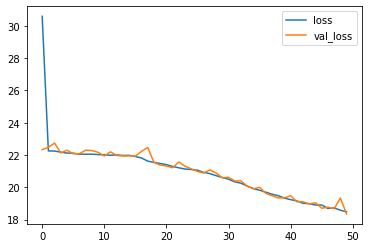

In [18]:
model_losses=pd.DataFrame(model.history.history)
model_losses.plot()

In [19]:
predictions=model.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


476/476 [==============================] - 2s 3ms/step


18.8445370947696

In [21]:

import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output
		

		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [22]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()